C:\Users\gauoo\AppData\Local\Temp\ipykernel_35600\3708760957.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


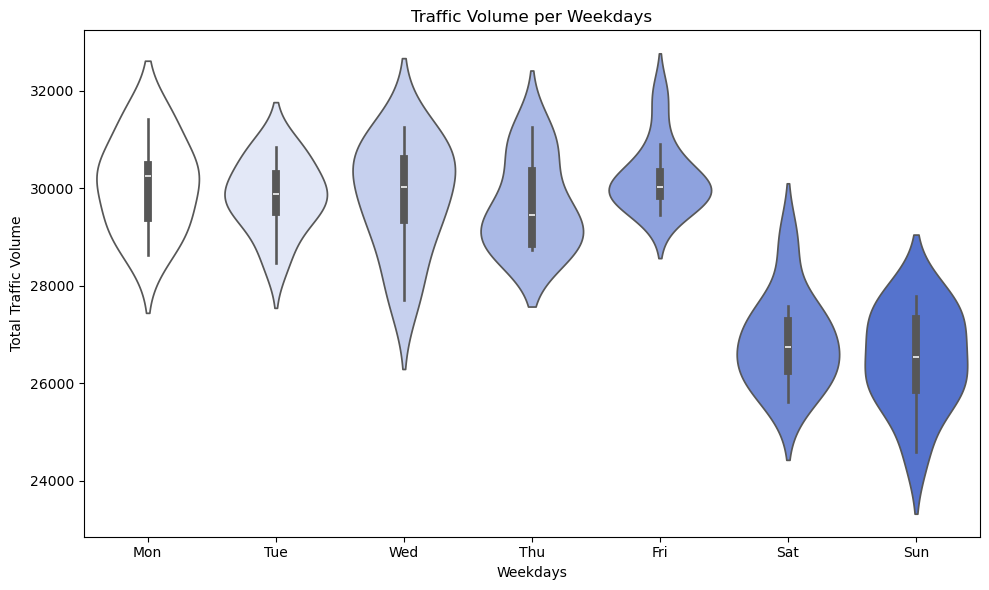

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import seaborn as sns
from math import ceil

# 1. 데이터 로드
traffic_data = np.load('../src/dataset/traffic_dataset_13_smoothen.npy')  # (T, E, 3) 형태

# 2. 파라미터 설정
steps_per_day = 8 * 60
total_steps = traffic_data.shape[0]  # 33600
num_days = total_steps // steps_per_day  # 70

# 3. 일별 교통량 총합 계산
# 교통량은 채널 0 (Volume)이라고 가정함
daily_total_volumes = []
for day in range(num_days):
    # 해당 일자의 스텝 범위 (시작 인덱스: day*48, 종료 인덱스: (day+1)*48)
    day_slice = slice(day * steps_per_day, (day + 1) * steps_per_day)
    # Volume 데이터 추출 후, 모든 스텝, 모든 노드의 합산
    daily_sum = np.sum(traffic_data[day_slice, :, 0])
    daily_total_volumes.append(daily_sum)



# 1) 요일 설정
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_of_week = [weekdays[day % 7] for day in range(num_days)]

# 5. 결과 DataFrame 생성
df = pd.DataFrame({
    'Day': range(1, num_days + 1),
    'Weekday': day_of_week,
    'TotalVolume': daily_total_volumes  
})

# 2) "흰색 -> royal blue" 선형 보간 컬러맵 생성
#    원하는 색상 코드(예: "#FFFFFF", "#4169E1") 리스트를 정의
cmap = mcolors.LinearSegmentedColormap.from_list(
    'WhiteToRoyalBlue',
    ['#FFFFFF', '#4169E1']  # 시작색, 끝색
)

# 3) 7개 요일에 대응할 색 추출
#    x=0.0 ~ 1.0 구간을 요일 개수(7)로 나눠서, 각 요일별 RGBA를 얻음
day2color = {}
for i, wd in enumerate(weekdays):
    # 0부터 1까지 6등분 -> i/(6) = i/(len(weekdays)-1)
    ratio = i / (len(weekdays) - 1)
    day2color[wd] = cmap(ratio)  # (R, G, B, A) 튜플로 반환

# 4) sns.violinplot()에 palette로 day2color를 전달
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Weekday',
    y='TotalVolume',
    data=df,
    order=weekdays,       # 요일 순서 지정
    palette=day2color     # 요일별 색상 매핑
)

plt.title('Traffic Volume per Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Total Traffic Volume')
plt.tight_layout()
plt.show()


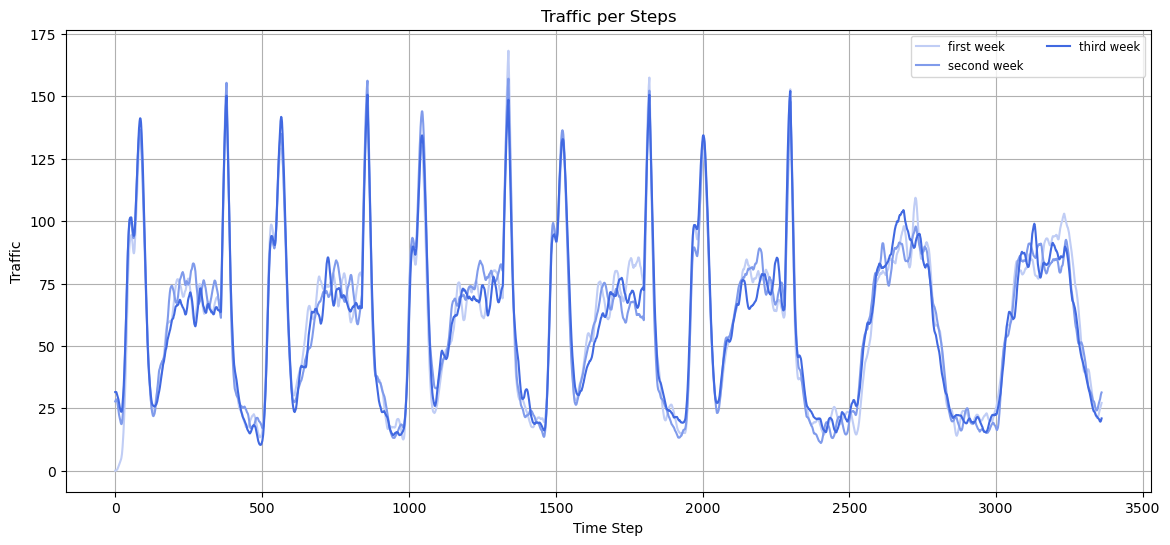

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 여기서는 3주(21일치) 데이터만 사용
# first_week: 1주차, second_week: 2주차, third_week: 3주차
step_total_volume = []
for step in range(len(traffic_data)):
    step_total_volume.append(sum(traffic_data[step,:,0]))


first_week  = step_total_volume[:(steps_per_day*7)]
second_week = step_total_volume[(steps_per_day*7):(steps_per_day*14)]
third_week  = step_total_volume[(steps_per_day*14):(steps_per_day*21)]

# 요일 순서 및 각 요일에 대응하는 16진수 색상
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_colors = {
    'Mon': '#FFFFFF',
    'Tue': '#E0E6FA',
    'Wed': '#C0CDF5',
    'Thu': '#A0B4F0',
    'Fri': '#809BEB',
    'Sat': '#6082E6',
    'Sun': '#4169E1'
}

# 주어진 한 주의 데이터를 요일별로 분할하여 플롯하는 헬퍼 함수
def plot_week(week_data, week_label, x_offset=0, steps_per_day=steps_per_day):
    """
    week_data: 한 주(7일치, 48*7 스텝) 데이터
    week_label: 예) '1st week'
    x_offset: 전체 x축 상에 주차간 간격 부여용 오프셋
    """
    for i, day in enumerate(weekdays):
        start = i * steps_per_day
        end = (i + 1) * steps_per_day
        x = np.arange(start + x_offset, end + x_offset)
        # 각 하루 데이터를 해당 요일 색상으로 플롯
        plt.plot(x, week_data[start:end],
                 color=day_colors[day],
                 label=f'{week_label} - {day}' if x_offset == 0 else None)

# 전체 3주를 이어서 플롯 (x축을 연속적으로 표현하기 위해 오프셋 적용)
plt.figure(figsize=(14, 6))

plt.plot(first_week, label='first week', color=day_colors['Wed'])
plt.plot(second_week, label='second week', color=day_colors['Fri'])
plt.plot(third_week, label='third week', color=day_colors['Sun'])

plt.title('Traffic per Steps')
plt.xlabel('Time Step')
plt.ylabel('Traffic')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()


In [5]:
# 맵 생성 정보
converted_nodes = [{'id': 0, 'type': 'H', 'coords': (10, 10)}, {'id': 1, 'type': 'I', 'coords': (5, 8)}, {'id': 2, 'type': 'S', 'coords': (7, 2)}, {'id': 3, 'type': 'C', 'coords': (6, 0)}, {'id': 4, 'type': 'S', 'coords': (2, 7)}, {'id': 5, 'type': 'C', 'coords': (5, 0)}, {'id': 6, 'type': 'S', 'coords': (2, 2)}, {'id': 7, 'type': 'I', 'coords': (4, 9)}, {'id': 8, 'type': 'O', 'coords': (1, 1)}, {'id': 9, 'type': 'C', 'coords': (5, 1)}, {'id': 10, 'type': 'R', 'coords': (7, 1)}, {'id': 11, 'type': 'R', 'coords': (9, 3)}, {'id': 12, 'type': 'I', 'coords': (4, 8)}, {'id': 13, 'type': 'S', 'coords': (7, 7)}, {'id': 14, 'type': 'C', 'coords': (8, 4)}, {'id': 15, 'type': 'O', 'coords': (2, 1)}, {'id': 16, 'type': 'R', 'coords': (8, 1)}, {'id': 17, 'type': 'R', 'coords': (8, 2)}, {'id': 18, 'type': 'C', 'coords': (1, 3)}, {'id': 19, 'type': 'R', 'coords': (9, 4)}]
converted_edges = [{'start': 0, 'end': 7, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 7, 'end': 0, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 1, 'end': 12, 'distance': 2.0, 'road_type': 'urban'}, {'start': 12, 'end': 1, 'distance': 2.0, 'road_type': 'urban'}, {'start': 2, 'end': 6, 'distance': 10.0, 'road_type': 'highway'}, {'start': 6, 'end': 2, 'distance': 10.0, 'road_type': 'highway'}, {'start': 2, 'end': 13, 'distance': 10.0, 'road_type': 'highway'}, {'start': 13, 'end': 2, 'distance': 10.0, 'road_type': 'highway'}, {'start': 2, 'end': 17, 'distance': 2.0, 'road_type': 'urban'}, {'start': 17, 'end': 2, 'distance': 2.0, 'road_type': 'urban'}, {'start': 3, 'end': 5, 'distance': 2.0, 'road_type': 'urban'}, {'start': 5, 'end': 3, 'distance': 2.0, 'road_type': 'urban'}, {'start': 4, 'end': 6, 'distance': 10.0, 'road_type': 'highway'}, {'start': 6, 'end': 4, 'distance': 10.0, 'road_type': 'highway'}, {'start': 4, 'end': 7, 'distance': 5.656854249492381, 'road_type': 'urban'}, {'start': 7, 'end': 4, 'distance': 5.656854249492381, 'road_type': 'urban'}, {'start': 4, 'end': 13, 'distance': 10.0, 'road_type': 'highway'}, {'start': 13, 'end': 4, 'distance': 10.0, 'road_type': 'highway'}, {'start': 5, 'end': 6, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 6, 'end': 5, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 5, 'end': 9, 'distance': 2.0, 'road_type': 'urban'}, {'start': 9, 'end': 5, 'distance': 2.0, 'road_type': 'urban'}, {'start': 5, 'end': 15, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 15, 'end': 5, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 5, 'end': 17, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 17, 'end': 5, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 6, 'end': 15, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 6, 'distance': 2.0, 'road_type': 'urban'}, {'start': 6, 'end': 18, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 18, 'end': 6, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 7, 'end': 12, 'distance': 2.0, 'road_type': 'urban'}, {'start': 12, 'end': 7, 'distance': 2.0, 'road_type': 'urban'}, {'start': 8, 'end': 15, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 8, 'distance': 2.0, 'road_type': 'urban'}, {'start': 10, 'end': 16, 'distance': 2.0, 'road_type': 'urban'}, {'start': 16, 'end': 10, 'distance': 2.0, 'road_type': 'urban'}, {'start': 10, 'end': 17, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 17, 'end': 10, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 11, 'end': 19, 'distance': 2.0, 'road_type': 'urban'}, {'start': 19, 'end': 11, 'distance': 2.0, 'road_type': 'urban'}, {'start': 13, 'end': 14, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 14, 'end': 13, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 14, 'end': 17, 'distance': 4.0, 'road_type': 'urban'}, {'start': 17, 'end': 14, 'distance': 4.0, 'road_type': 'urban'}, {'start': 14, 'end': 18, 'distance': 14.142135623730951, 'road_type': 'urban'}, {'start': 18, 'end': 14, 'distance': 14.142135623730951, 'road_type': 'urban'}, {'start': 14, 'end': 19, 'distance': 2.0, 'road_type': 'urban'}, {'start': 19, 'end': 14, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 17, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 17, 'end': 15, 'distance': 12.165525060596439, 'road_type': 'urban'}]

adj = [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0.],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0.],
 [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0.],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1.],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0.]]

random_prob = {'R': 0.16, 'I': 0.1, 'C': 0.1, 'O': 0.1, 'H': 0.3, 'S': 0.0, 'day_night_ratio': 0.25, 'step_of_visit': 20}

edge_idx_map = {(0, 7): 0, (7, 0): 1, (1, 12): 2, (12, 1): 3, (2, 6): 4, (6, 2): 5, (2, 13): 6, (13, 2): 7, (2, 17): 8, (17, 2): 9, (3, 5): 10, (5, 3): 11, (4, 6): 12, (6, 4): 13, (4, 7): 14, (7, 4): 15, (4, 13): 16, (13, 4): 17, (5, 6): 18, (6, 5): 19, (5, 9): 20, (9, 5): 21, (5, 15): 22, (15, 5): 23, (5, 17): 24, (17, 5): 25, (6, 15): 26, (15, 6): 27, (6, 18): 28, (18, 6): 29, (7, 12): 30, (12, 7): 31, (8, 15): 32, (15, 8): 33, (10, 16): 34, (16, 10): 35, (10, 17): 36, (17, 10): 37, (11, 19): 38, (19, 11): 39, (13, 14): 40, (14, 13): 41, (14, 17): 42, (17, 14): 43, (14, 18): 44, (18, 14): 45, (14, 19): 46, (19, 14): 47, (15, 17): 48, (17, 15): 49}
node_idx_map = {0: (0, 7), 1: (7, 0), 2: (1, 12), 3: (12, 1), 4: (2, 6), 5: (6, 2), 6: (2, 13), 7: (13, 2), 8: (2, 17), 9: (17, 2), 10: (3, 5), 11: (5, 3), 12: (4, 6), 13: (6, 4), 14: (4, 7), 15: (7, 4), 16: (4, 13), 17: (13, 4), 18: (5, 6), 19: (6, 5), 20: (5, 9), 21: (9, 5), 22: (5, 15), 23: (15, 5), 24: (5, 17), 25: (17, 5), 26: (6, 15), 27: (15, 6), 28: (6, 18), 29: (18, 6), 30: (7, 12), 31: (12, 7), 32: (8, 15), 33: (15, 8), 34: (10, 16), 35: (16, 10), 36: (10, 17), 37: (17, 10), 38: (11, 19), 39: (19, 11), 40: (13, 14), 41: (14, 13), 42: (14, 17), 43: (17, 14), 44: (14, 18), 45: (18, 14), 46: (14, 19), 47: (19, 14), 48: (15, 17), 49: (17, 15)}

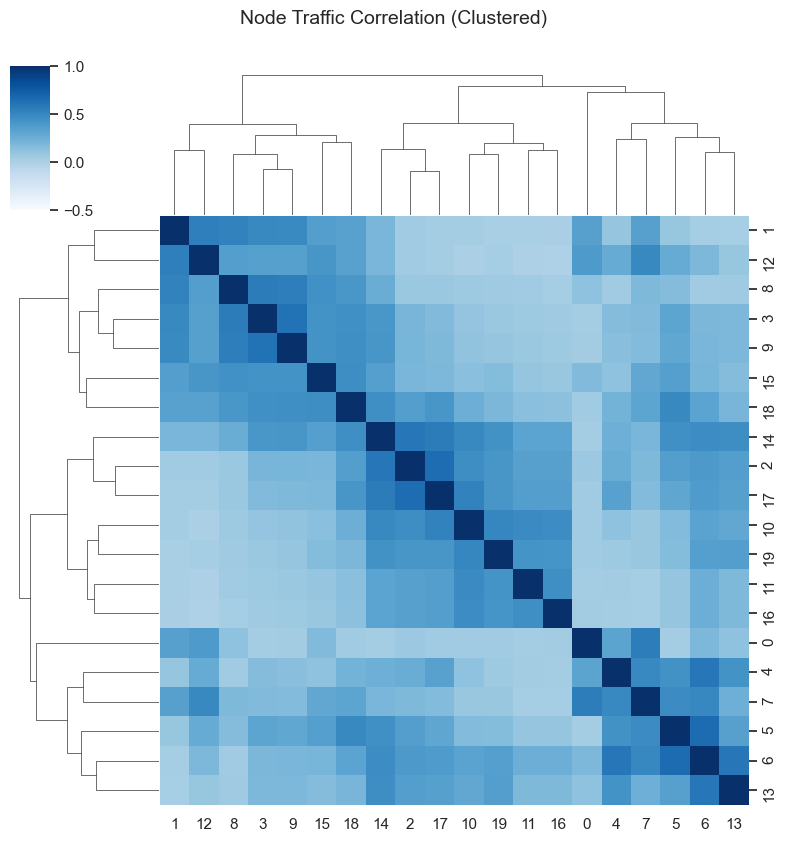

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# corr_matrix: (N x N) 형태의 상관행렬(피어슨 상관계수)
traffic_data_mat = np.zeros((traffic_data.shape[0],len(converted_nodes),len(converted_nodes),traffic_data.shape[2]))
for i in range(traffic_data.shape[1]):
    u, v = node_idx_map[i]
    traffic_data_mat[:,u,v,:] = traffic_data[:,i,:]


node_time_series = np.sum(traffic_data_mat[:, :, :, 0], axis=2)  # shape: (T, N)
# (또는 각 노드의 유입량을 확인하려면, axis=1로 합산할 수도 있습니다.)

# 2. 각 노드별 시계열 데이터에 대한 상관행렬 계산 (피어슨 상관계수)
# numpy.corrcoef는 행/열 기준 계산을 지원하므로, 전치하여 각 열이 하나의 시계열이 되도록 합니다.
corr_matrix = np.corrcoef(node_time_series.T)

sns.set_theme(style='white')

# clustermap 함수 사용
g = sns.clustermap(
    corr_matrix,
    method='average',   # 클러스터링 방법 (average, single, complete, ward 등)
    metric='euclidean', # 거리 계산 방법 (euclidean, cityblock 등)
    cmap='Blues',
    vmin=-0.5,
    vmax=1,
    figsize=(8, 8)
)
g.fig.suptitle("Node Traffic Correlation (Clustered)", fontsize=14, y=1.05)
g.ax_heatmap.set_aspect('equal')
plt.show()
